In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Data loading
data = pd.read_csv("hour.csv")

print("Data Head:")
print(data.head())
print("\nData Info:")
print(data.info())

Data Head:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378


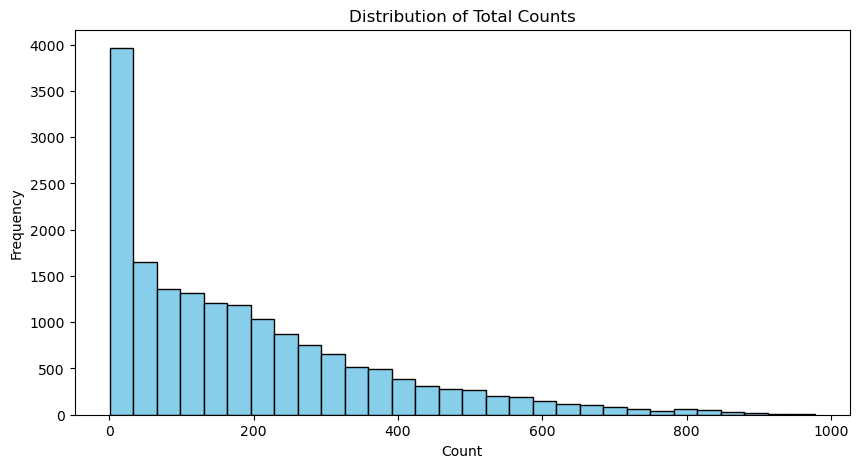

In [33]:
# ---Visualization Section---

# Figure histogram
plt.figure(figsize=(10, 5))
plt.hist(data['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

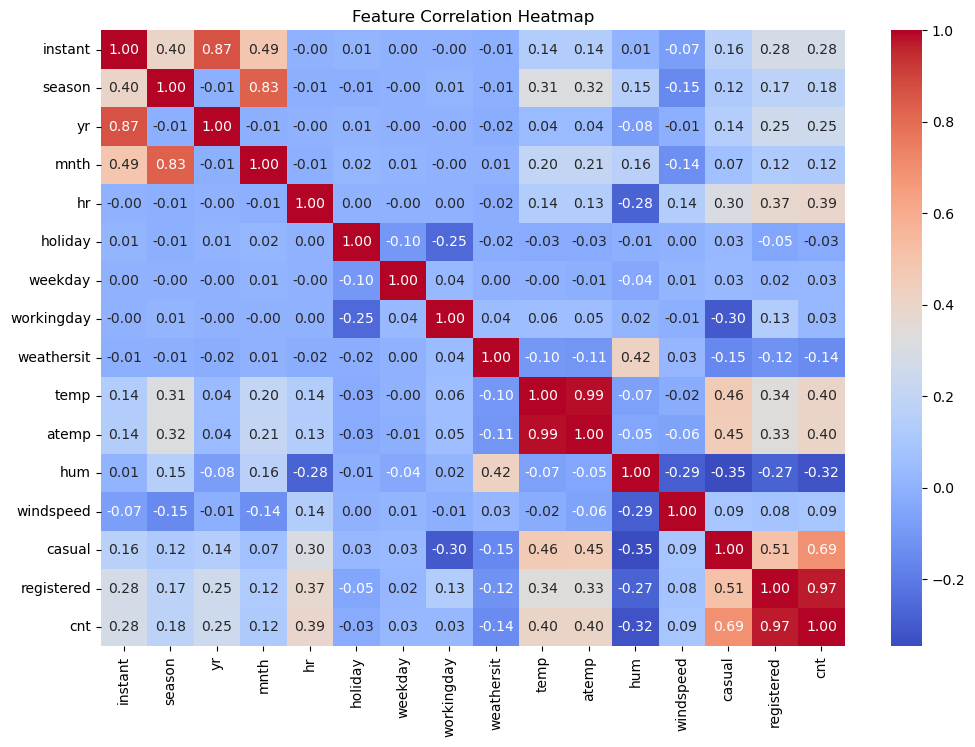

In [34]:
# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
# ---Preprocessing Section---

# Selecting specific features for regression
features = ["temp", "hum", "windspeed", "hr", "weekday"]
X = data[features].values
y = data["cnt"].values

# Split train/test validation
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
# ---Linear Regression Section---

def linear_regression_train(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
   
    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        weights -= lr * dw
        bias -= lr * db

    return weights, bias

def linear_regression_predict(X, weights, bias):
    return np.dot(X, weights) + bias

In [37]:
# Train Linear Regression
lr_weights, lr_bias = linear_regression_train(X_train, y_train)
y_val_pred_lr = linear_regression_predict(X_val, lr_weights, lr_bias)

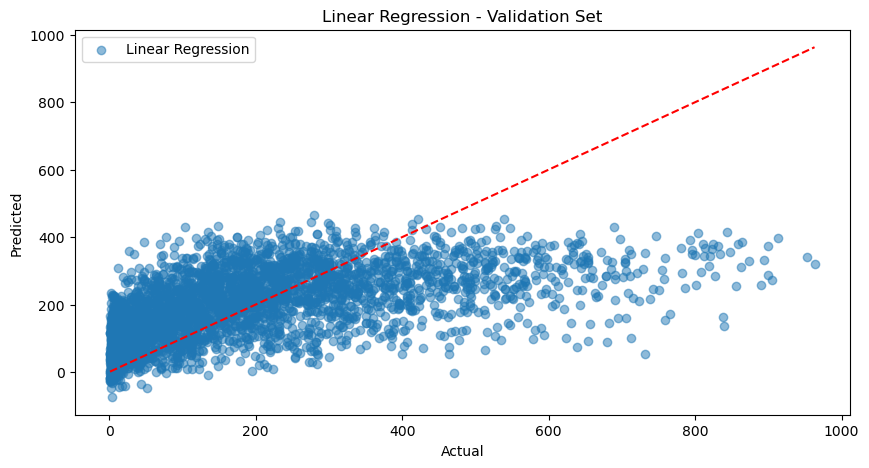


Linear Regression Validation Performance:
MSE: 21771.16783090271
R2: 0.3304470180783121


In [38]:
# Linear Regression Validation Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred_lr, alpha=0.5, label='Linear Regression')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression - Validation Set")
plt.legend()
plt.show()
print("\nLinear Regression Validation Performance:")
print("MSE:", mean_squared_error(y_val, y_val_pred_lr))
print("R2:", r2_score(y_val, y_val_pred_lr))

In [39]:
# ---Neural Netork Section---

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [40]:
def nn_train_regression(X, y, hidden_size=50, lr=0.01, epochs=500):
    m, n = X.shape
    np.random.seed(42)
    W1 = np.random.randn(n, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1) * 0.01
    b2 = np.zeros((1, 1))

    y = y.reshape(-1, 1)

    for _ in range(epochs):
        Z1 = np.dot(X, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = Z2

        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return W1, b1, W2, b2

def nn_predict_regression(X, W1, b1, W2, b2):
    A1 = relu(np.dot(X, W1) + b1)
    return np.dot(A1, W2) + b2

In [41]:
# Train Neural Network
W1, b1, W2, b2 = nn_train_regression(X_train, y_train)
y_val_pred_nn = nn_predict_regression(X_val, W1, b1, W2, b2).flatten()

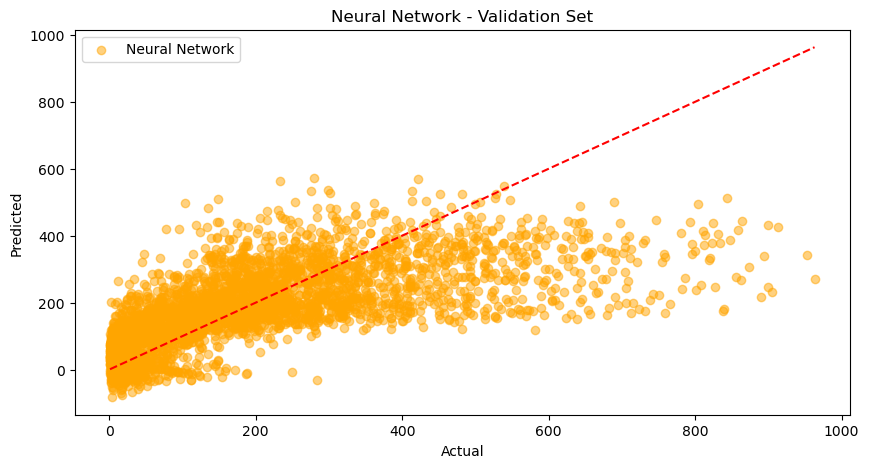


Neural Network Validation Performance:
MSE: 17516.291279878536
R2: 0.46130197747112556


In [42]:
# Neural Network Validation Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred_nn, alpha=0.5, color='orange', label='Neural Network')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network - Validation Set")
plt.legend()
plt.show()
print("\nNeural Network Validation Performance:")
print("MSE:", mean_squared_error(y_val, y_val_pred_nn))
print("R2:", r2_score(y_val, y_val_pred_nn))

In [43]:
# ---Final Tests Sections---

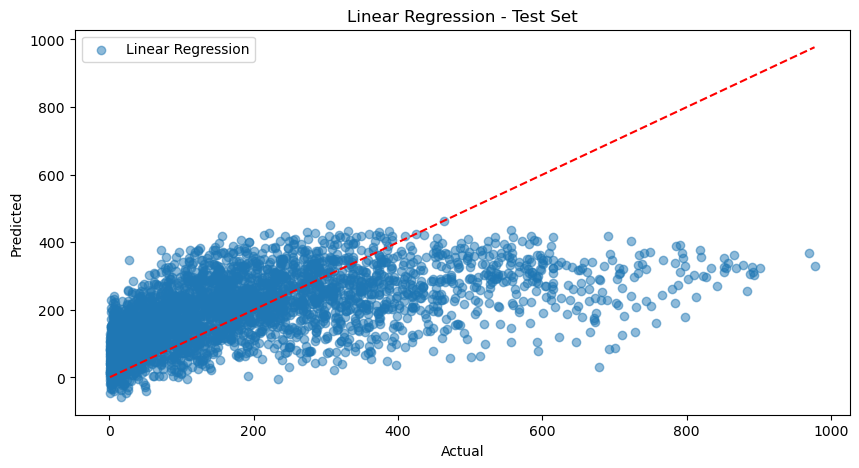


Linear Regression Test Performance:
MSE: 20991.079464193866
R2: 0.3370975276096725


In [44]:
# Linear Regression Test Plot
y_test_pred_lr = linear_regression_predict(X_test, lr_weights, lr_bias)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred_lr, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression - Test Set")
plt.legend()
plt.show()
print("\nLinear Regression Test Performance:")
print("MSE:", mean_squared_error(y_test, y_test_pred_lr))
print("R2:", r2_score(y_test, y_test_pred_lr))

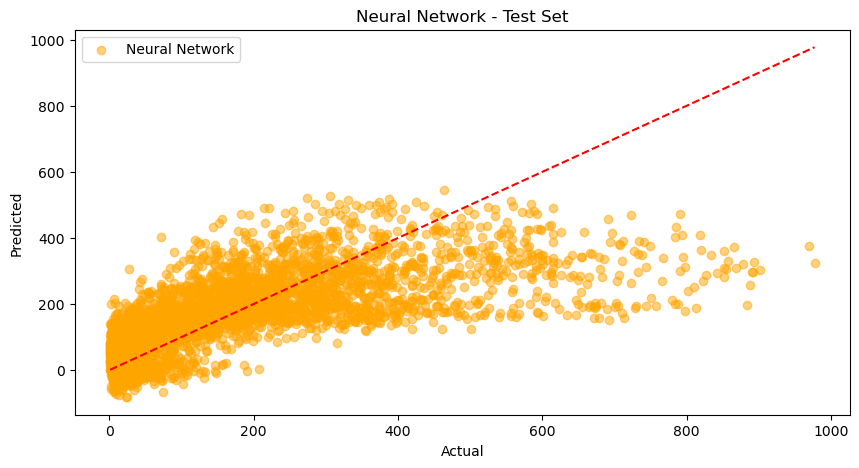


Neural Network Test Performance:
MSE: 17325.521301506793
R2: 0.4528565848263675


In [45]:
# Neural Network Test Plot
y_test_pred_nn = nn_predict_regression(X_test, W1, b1, W2, b2).flatten()
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred_nn, alpha=0.5, color='orange', label='Neural Network')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network - Test Set")
plt.legend()
plt.show()
print("\nNeural Network Test Performance:")
print("MSE:", mean_squared_error(y_test, y_test_pred_nn))
print("R2:", r2_score(y_test, y_test_pred_nn))